In [ ]:
!pip install scikit-surprise

In [3]:
import pandas as pd

from surprise import Reader, Dataset, SVD

from surprise.accuracy import rmse, mae
from surprise.model_selection import cross_validate

In [4]:
df = pd.read_csv('/content/ratings.csv')
df.drop('timestamp', axis = 1, inplace = True)

In [5]:
df.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [7]:
df.isna().sum()

userId     0
movieId    0
rating     0
dtype: int64

In [8]:
n_movies = df["movieId"].nunique()
n_users = df['userId'].nunique()

In [9]:
avail_ratings = df['rating'].count()
total_ratings = n_movies * n_users
missing_ratings = total_ratings - avail_ratings
sparsity = (missing_ratings/total_ratings) * 100

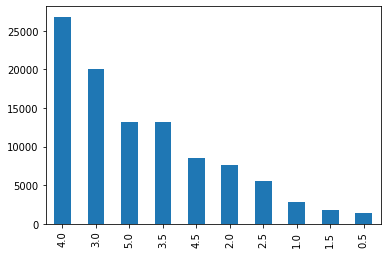

In [15]:
df['rating'].value_counts().plot(kind = 'bar');

In [19]:
filter_movies = df['movieId'].value_counts() > 3
filter_movies = filter_movies[filter_movies].index.tolist()

In [20]:
filter_users = df['userId'].value_counts() > 3
filter_users = filter_users[filter_users].index.tolist()

In [22]:
df = df[(df['movieId'].isin(filter_movies)) & (df['userId'].isin(filter_users))]

In [23]:
cols = ['userId', 'movieId', 'rating']

In [24]:
reader = Reader(rating_scale=(0.5,5))
data = Dataset.load_from_df(df = df[cols], reader = reader)

In [25]:
trainset = data.build_full_trainset()
antiset = trainset.build_anti_testset()

In [27]:
algo = SVD(n_epochs=25, verbose=True)

In [28]:
cross_validate(algo, data, cv = 5, verbose=True)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 0
P

{'fit_time': (5.85087776184082,
  5.886972904205322,
  5.8386712074279785,
  5.88489294052124,
  5.840328216552734),
 'test_mae': array([0.66845894, 0.65587596, 0.65703529, 0.658516  , 0.65880816]),
 'test_rmse': array([0.87244716, 0.85379216, 0.85772324, 0.86017982, 0.8613825 ]),
 'test_time': (1.2153465747833252,
  0.1387166976928711,
  0.14333152770996094,
  0.12882304191589355,
  0.15455055236816406)}

In [30]:
predictions = algo.test(antiset)

In [31]:
predictions[:5]

[Prediction(uid=1, iid=318, r_ui=3.529119856267723, est=5, details={'was_impossible': False}),
 Prediction(uid=1, iid=1704, r_ui=3.529119856267723, est=4.984836660805088, details={'was_impossible': False}),
 Prediction(uid=1, iid=6874, r_ui=3.529119856267723, est=4.675273506481423, details={'was_impossible': False}),
 Prediction(uid=1, iid=8798, r_ui=3.529119856267723, est=4.658772687890469, details={'was_impossible': False}),
 Prediction(uid=1, iid=46970, r_ui=3.529119856267723, est=4.2134576107816155, details={'was_impossible': False})]

In [33]:
from collections import defaultdict

def get_top_n(predictiona,n):
  top_n = defaultdict(list)
  for uid, iid, _, est, _ in predictions:
    top_n[uid].append((iid, est))

  for uid, user_ratings in top_n.items():
    user_ratings.sort(key = lambda x: x[1], reverse = True)
    top_n[uid] = user_ratings[:n]

  return top_n

top_n = get_top_n(predictions, n = 3)
for uid, user_ratings in top_n.items():
  print(uid, [iid for (iid, rating) in user_ratings])

1 [318, 898, 908]
2 [720, 908, 1276]
3 [1204, 750, 1084]
4 [1248, 1210, 4973]
5 [593, 56782, 1276]
6 [1276, 57669, 54997]
7 [527, 318, 2571]
8 [1204, 1199, 2959]
9 [1196, 7153, 720]
10 [4642, 1204, 1276]
11 [2571, 246, 50]
12 [260, 457, 527]
13 [318, 50, 1204]
14 [4226, 2324, 112552]
15 [1223, 1250, 1221]
16 [720, 908, 109487]
17 [1199, 912, 720]
18 [1204, 898, 1199]
19 [1204, 246, 8874]
20 [296, 1208, 2571]
21 [246, 6377, 805]
22 [527, 296, 720]
23 [1204, 1104, 3037]
24 [1204, 2959, 246]
25 [50, 356, 1136]
26 [1104, 1281, 1199]
27 [318, 2571, 527]
28 [1225, 750, 1945]
29 [1221, 1199, 80906]
30 [898, 750, 741]
31 [2324, 2959, 3578]
32 [2571, 61240, 1204]
33 [5991, 1204, 92259]
34 [1204, 1199, 5618]
35 [3030, 912, 720]
36 [720, 898, 1203]
37 [2324, 112552, 898]
38 [745, 750, 7361]
39 [4993, 246, 7153]
40 [1203, 1196, 720]
41 [3246, 1204, 148626]
42 [1209, 923, 1208]
43 [50, 223, 235]
44 [898, 48516, 1204]
45 [58559, 293, 5816]
46 [898, 3037, 1276]
47 [2067, 246, 1197]
48 [1204, 318, 368